In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import scale
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import os

50elefin_63


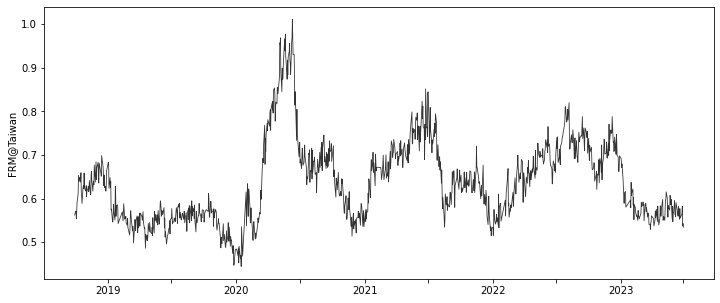

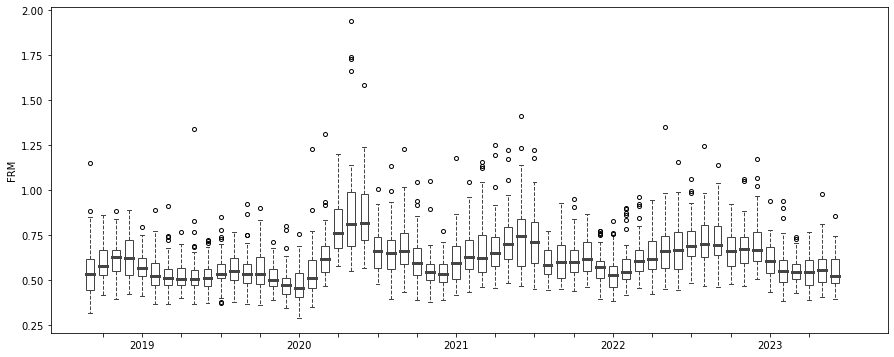

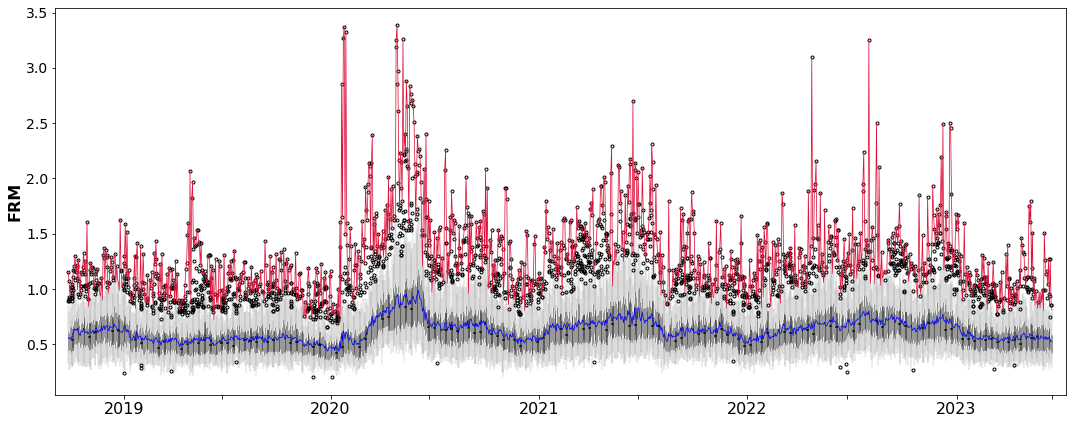

In [10]:
dir_list = [item for item in os.listdir(os.getcwd()) if os.path.isdir(item)]
dir_list = ['50elefin_63']
for dir_name in dir_list:
    #####

    folder = dir_name
    company = folder.split('_')[0]
    ncol_xx0 = int(folder.split('_')[0][:2])
    ws = int(folder.split('_')[1])

    #####

    print(folder)
    company_choose = {}
    company_choose['25ele'] = ['2330', '2317', '2454', '2382', '2412', '2308', '2303', '3711', '3045', '2395', '3231', '2301', '3008', '2345', '2357', '3037', '3034', '4904', '2327', '4938', '2408', '2379', '3661', '3443', '2376']
    company_choose['25fin'] = ['2881', '2882', '2886', '2891', '2884', '5880', '2892', '2885', '2880', '2887', '2890', '2883', '2801', '2888', '2834', '2812', '2838', '2845', '2809', '2889', '6005', '2855', '2897', '2867', '2849']
    company_choose['50cap'] = ['2330', '2317', '2454', '2382', '2412', '2308', '2881', '6505', '2882', '2303', '2886', '1303', '1301', '2891', '3711', '1216', '2002', '2884', '5880', '2207', '2892', '1326', '3045', '2885', '2395', '3231', '5871', '2301', '3008', '2880', '2345', '2912', '2357', '3037', '3034', '2603', '1101', '4904', '2887', '2327', '2890', '4938', '2408', '2379', '2883', '1590', '3661', '2801', '3443', '9910']
    company_choose['50elefin'] = ['2330', '2317', '2454', '2382', '2412', '2308', '2303', '3711', '3045', '2395', '3231', '2301', '3008', '2345', '2357', '3037', '3034', '4904', '2327', '4938', '2408', '2379', '3661', '3443', '2376', '2881', '2882', '2886', '2891', '2884', '5880', '2892', '2885', '2880', '2887', '2890', '2883', '2801', '2888', '2834', '2812', '2838', '2845', '2809', '2889', '6005', '2855', '2897', '2867', '2849']

    Taiwan = company_choose[company]


    data = pd.read_csv(f'../00 Raw Data/{company}.csv', parse_dates=['Date'], index_col='Date').rename_axis(None, axis=0)
    macro = pd.read_csv('../00 Raw Data/macro_return.csv', parse_dates=['Date'], index_col='Date').rename_axis(None, axis=0)

    xx0 = data.drop(columns=data.columns[0])
    xx0 = scale(xx0)

    m = macro.drop(columns=macro.columns[0])
    m = scale(m)

    # 計算22個lambda序列的平均值
    full_lambda = np.zeros((xx0.shape[0] - ws, ncol_xx0))

    for j in range(ncol_xx0):
        lambda_firm = pd.read_csv(f"../02 Modeling/{folder}/lambda_l_{j + 1}.csv")
        full_lambda[:, j] = lambda_firm.iloc[:, 1].to_numpy()

    full_lambda = pd.DataFrame(full_lambda)
    full_lambda.index = data.index[ws:]
    full_lambda.columns = Taiwan
    full_lambda.to_csv(f'../02 Modeling/{folder}/full_lambda.csv')


    average_lambda = np.sum(full_lambda, axis=1) / xx0.shape[1]
    average_lambda_df = pd.DataFrame({'FRM': average_lambda})

    period = data.index
    average_lambda_df.index = period[ws:]

    # 畫圖
    plt.figure(figsize=(12,5))
    plt.plot(average_lambda.index, average_lambda, color='k', linewidth=0.8, label='FRM', alpha=0.8)
    plt.xticks(ticks=["2019-01-02", "2019-07-01", "2020-01-02", "2020-07-01", "2021-01-04", "2021-07-01", "2022-01-03", "2022-07-01", "2023-01-03", "2023-06-30"], 
            labels=['2019', '', '2020', '', '2021', '', '2022', '', '2023', ''])
    plt.xlabel('')
    plt.ylabel('FRM@Taiwan')
    plt.savefig(f'{folder}/FRM_Taiwan_{company}.png', transparent=True, dpi=144)
    plt.show()



    # 重新採樣full_lambda的數據，每月計算平均值
    full_lambda_monthly = full_lambda.resample('M').mean()

    # 設置圖形的大小
    plt.figure(figsize=(15, 6))

    # 繪製boxplot
    sns.boxplot(data=full_lambda_monthly.T, width=0.6, linewidth=1, whis=1.5,
    boxprops=dict(facecolor='none'), 
    flierprops=dict(marker='o', markersize=4, linewidth=0.5, markerfacecolor='none', markeredgecolor='black'),
    medianprops=dict(linewidth=3),
    whiskerprops=dict(linestyle='--'))
    # 設置圖形的標題和軸標籤
    plt.ylabel("FRM")

    # 設置x軸的標籤，只顯示年份
    all_dates = [item.strftime('%Y-%m') for item in full_lambda_monthly.index]
    visible_dates = [item.strftime('%Y') if item.month == 1 else "" for item in full_lambda_monthly.index]

    # 設置x軸的刻度和標籤
    quarterly_ticks = [i for i, date in enumerate(all_dates) if date[-2:] in ['01', '04', '07', '10']]
    plt.xticks(quarterly_ticks, [visible_dates[i] for i in quarterly_ticks])

    # 設置x軸的範圍，從而在最左邊和最右邊留下一些空白
    padding = 3  # 設置要留下的空白的月數
    plt.xlim(-padding, len(full_lambda_monthly)+padding)

    # 顯示圖形
    plt.savefig(f'{folder}/Monthly_Lambdas_Boxplot_{company}.png', transparent=True, dpi=144)
    plt.show()



    # 重新採樣full_lambda的數據，保持每日的頻率
    full_lambda_daily = full_lambda

    # 設置圖形的大小
    plt.figure(figsize=(15, 6))

    # 繪製boxplot
    sns.boxplot(data=full_lambda_daily.T, width=0.1, linewidth=0.2, whis=1.5,
        meanline=True, showmeans=True, 
        boxprops=dict(facecolor='none', linewidth=0.5, edgecolor='black', alpha=0.8), 
        flierprops=dict(marker='o', markersize=3, linewidth=0.25, markerfacecolor='none', markeredgecolor='black'),
        medianprops=dict(linewidth=1.5, color='black'),
        whiskerprops=dict(linestyle='--', color='black'),
        capprops=dict(color='black'))

    # 繪製每天的max值的紅色線
    plt.plot(full_lambda_daily.max(axis=1).values, color='crimson', label='Max Value', linewidth=0.75)

    # 繪製mean的藍色線
    plt.plot(full_lambda_daily.mean(axis=1).values, color='blue', label='Mean Value', linewidth=0.75)

    # 設置圖形的標題和軸標籤
    plt.ylabel("FRM", fontsize=16, fontweight='heavy')

    xtick_indices = [full_lambda_daily.index.get_loc(d) for d in 
                    ["2019-01-02", "2019-07-01", "2020-01-02", 
                    "2020-07-01", "2021-01-04", "2021-07-01", "2022-01-03", "2022-07-01", "2023-01-03", "2023-06-30"]]
    xtick_labels = ['2019', '', '2020', '', '2021', '', '2022', '', '2023', '']

    # 設置x軸的刻度和標籤
    yearly_ticks = [i for i, date in enumerate(all_dates) if date[5:7] == '01' and date[8:10] == '01']

    # 設置x軸的範圍，從而在最左邊和最右邊留下一些空白
    padding = 15  # 設置要留下的空白的天數
    plt.xlim(-padding, len(full_lambda_daily) + padding)
    plt.yticks(fontsize=14)
    plt.xticks(ticks=xtick_indices, labels=xtick_labels, fontsize=16)

    # 顯示圖形
    plt.tight_layout()  # 確保所有的標籤都可見
    plt.savefig(f'{folder}/Daily_Lambdas_Boxplot_{company}.png', transparent=True, dpi=144)
    plt.show()
